# **4.5 유용한 특성 선택**

**과대적합(overfitting)**<br>
- 모델이 테스트 데이터셋보다 훈련 데이터셋에서 성능이 높은 경우 과대적합 가능성이 높다.
- 훈련 데이터에 비해 모델이 복잡해서 발생한다.
- 모델 파라미터가 훈련 데이터셋에 있는 특정 샘플들에 대해 너무 가깝게 맞추어져 있다는 의미
- 분산이 커서 새로운 데이터에 잘 일반화하지 못한다.

<br>

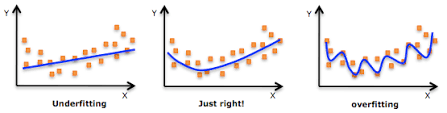


과대적합을 **방지**하기 위한 방법
- **더 많은** 훈련 데이터 확보
- 규제를 통한 **복잡도 제한**
- 파라미터 개수가 적은 **간단한 모델 선택**
- 데이터 **차원 줄이기**


---

<br>



## **4.5.1 모델 복잡도 제한을 위한 L1 규제와 L2 규제**

**L2 규제(L2 regularization)**<br>

$$L2: \|w\|^{2}_{2} = \displaystyle\sum_{j=1}^{m} w^{2}_{j}$$

- 개별 가중치 값을 제한하여 모델 복잡도를 줄인다.
- 비용 함수에 페널티 항(penalty term)을 추가하여, 가중치 값을 작게 만든다.

**L1 규제(L1 regularization)**<br>

$$L1: \|w\|_{1} = \displaystyle\sum_{j=1}^{m} |w_{j}|$$

- 희소한 특성 벡터를 만들어 대부분의 특성 가중치가 0이 된다.
- 관련 없는 특성이 많은 고차원 데이터셋일 경우 이런 희소성이 도움이 된다.

---

<br>

## **4.5.2 L2 규제의 기하학적 해석**

우리의 목표는 훈련 데이터에서 **비용 함수를 최소화하는 가중치 값의 조합**을 찾는 것이다.<br>

그림에서 **Minimize cost**(최소 비용)라고 된 **타원의 중심** 지점을 말한다.




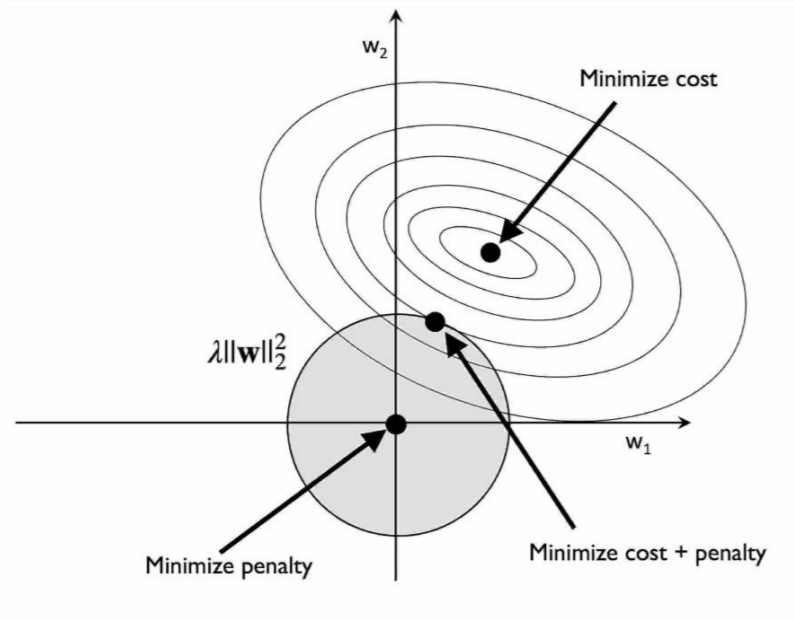

L2 규제는 비용 함수에 페널티 항(penalty term)을 추가한다.<br>

페널티 항을 통해 **가중치가 커지는 것을 제한**한다.<br>
페널티 항으로 **규제 파라미터 λ**를 사용한다.<br> 

L2 규제항:<br>
$$\lambda\|w\|^{2}_{2}$$

<br>

**L2 규제 항**은 이차식이라 **회색 원**으로 표현된다.<br>
가중치 값의 조합은 **회색 원 바깥에 놓일 수 없다**.<br>
**규제 파라미터 λ가 커질수록** 페널티 비용이 빠르게 증가하여 L2 원을 작게 만들어 **가중치 값이 0에 가까워진다.**<br><br>



페널티 제약이 있는 상황에서 최선의 상황은 **L2 회색 원**과 규제가 없는 **비용 함수의 등고선이 만나는 지점**이다.<br>
그림에서는 **Minimize cost + penalty** 지점에 해당한다.<br><br>

목표:<br>
**규제가 없는 비용과 페널티 항의 합 최소화**<br>
=> 충분한 훈련 데이터가 없을 때, **편향을 추가**하여 모델을 간단하게 만들어 **분산을 줄이는 것**으로 해석할 수 있다.

*편향(bias): 예측이 정확한 값에서 떨어진 정도*<br>
*분산(variance): 예측의 일관성(또는 변동성)*

---

<br>


## **4.5.3 L1 규제를 사용한 희소성**

**L1 페널티**는 가중치 **절댓값의 합**이기 때문에 **다이아몬드 모양**으로 표현된다.<br><br>

L1 규제의 등고선은 날카로워서 비용 함수의 포물선과 L1 다이아몬드의 경계가 만나는 **최적점이 축에 가깝게 위치할 가능성이 높다**.<br>

이런 구조 때문에 대부분의 특성 가중치가 0이 되는 **희소성**이 나타난다.<br>

*아래 그림에서 보면 ```w_1 = 0```일 때 비용 함수의 등고선이 L1 다이아몬드와 만나는 것을 볼 수 있다.*<br>



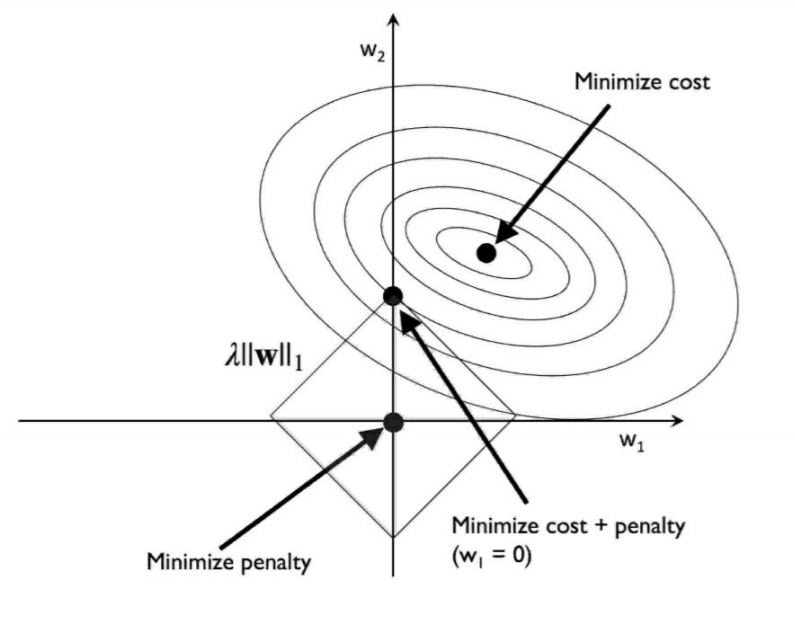

L1 규제를 지원하는 모델을 사용할 땐, **```penalty``` 매개변수를 'l1'**으로 지정하면 된다.

In [21]:
from sklearn.linear_model import LogisticRegression
LogisticRegression(solver='liblinear', penalty='l1')

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

```LogisticRegression``` 클래스의 ```solver``` 매개변수에 사용할 수 있는 값
* L2 규제만 지원
  - lbfgs
  - newton-cg
  - sag
* L1, L2 규제 모두 지원
  - saga
  - liblinear

In [22]:
lr = LogisticRegression(solver='liblinear', penalty='l1',
                        C=1.0, random_state=1)

lr.fit(X_train_std, y_train)
print('훈련 정확도:', lr.score(X_train_std, y_train))
print('테스트 정확도:', lr.score(X_test_std, y_test))

훈련 정확도: 1.0
테스트 정확도: 1.0


훈련과 테스트 정확도(둘 다 **100%**)를 보고, 모델이 두 데이터셋에 **완벽하게 작동**하는 것을 확인할 수 있다.<br>

<br>

```LogisticRegression``` 클래스의 **```C``` 매개변수**는 규제 파라미터 **λ의 역수**이며, **기본값은 1.0**이다.<br>

규제 효과를 높이거나 낮추려면 C 값을 증가시키거나 감소시키면 된다.

In [23]:
lr.intercept_

array([-1.2639642 , -1.21594235, -2.37050719])

**```lr.intercept_``` 속성**으로 절편을 확인해 보면 **세 개의 값이 들어 있는 배열이 반환**된다.
 - *```intercept_```는 ```w_0```에 해당한다.*

<br>

**```solver='liblinear'```**로 초기화한 LogisticRegression 객체를 다중 클래스 데이터셋에 적용하면 **OvR(One-versus-Rest) 방식을 사용**한다.<br>

- 첫 번째 절편: **클래스 1**을 클래스 **2, 3과 구분**하는 모델의 절편
- 두 번째 절편: **클래스 2**를 클래스 **1, 3과 구분**하는 모델의 절편
- 세 번째 절편: **클래스 3**을 클래스 **1, 2와 구분**하는 모델의 절편


In [24]:
lr.coef_

array([[ 1.24641296,  0.17999168,  0.74629471, -1.1640092 ,  0.        ,
         0.        ,  1.15853575,  0.        ,  0.        ,  0.        ,
         0.        ,  0.55799892,  2.50839749],
       [-1.53717641, -0.38719849, -0.99476611,  0.36466499, -0.05964102,
         0.        ,  0.66793791,  0.        ,  0.        , -1.93377181,
         1.23398109,  0.        , -2.23227845],
       [ 0.13595028,  0.16828119,  0.35723005,  0.        ,  0.        ,
         0.        , -2.43810556,  0.        ,  0.        ,  1.56352616,
        -0.81893878, -0.49273991,  0.        ]])

**```lr.coef_``` 속성**에 있는 가중치는 **클래스마다 벡터 하나씩 세 개의 행**이 있는 **가중치 배열**이다.<br>
- *```coef_```에 있는 값은 ```j < 0```인 ```w_j```이다.*

각 행은 **데이터셋의 특성만큼의 가중치**를 가진다. <br>

따라서 위 결과에서는 13개의 특성이 있는 Wine 데이터셋을 사용하므로, **13개의 가중치를 가진다**.<br><br>

최종 입력을 계산할 땐, 각 가중치와 N차원의 특성을 곱한다.<br>

$$ z = w_{0}x_{0} + \cdots + w_{m}x_{m} = \sum^{m}_{j=0} w_{j}x_{j} = w^{T}x$$

<br><br>

L1 규제는 결과적으로 데이터셋에 **관련이 적은 특성이 있더라도 견고한 모델**을 만들어 준다.<br>

매개변수 **C 값을 낮추면 규제 강도가 높아져 희소성이 강해**진다.

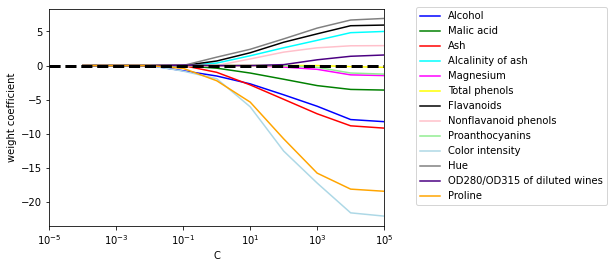

In [25]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.subplot(111)

colors = ['blue', 'green', 'red', 'cyan',
'magenta', 'yellow', 'black',
'pink', 'lightgreen', 'lightblue',
'gray', 'indigo', 'orange']
weights, params = [], []

for c in np.arange(-4., 6.):
  lr = LogisticRegression(solver='liblinear',
                          penalty='l1', C=10.**c,
                          random_state=0)
  lr.fit(X_train_std, y_train)
  weights.append(lr.coef_[1])
  params.append(10**c)

weights = np.array(weights)

for column, color in zip(range(weights.shape[1]), colors):
  plt.plot(params, weights[:, column],
           label=df_wine.columns[column + 1],
           color=color)
plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-5), 10**5])
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center',
          bbox_to_anchor=(1.38, 1.03),
          ncol=1, fancybox=True)
plt.show()

이 그래프에서 볼 수 있듯이 **강한 규제 파라미터(C < 0.1)**로 모델을 제약하면 **모든 가중치가 0**이 된다.

---

<br>

## **4.5.4 순차 특성 선택 알고리즘**

### **차원 축소(dimensionality reduction)**:<br>
모델 복잡도를 줄이고 과대적합을 피하는 방법 중 하나이다.<br>
**규제가 없는 모델에서 유용**하다.<br><br>

차원 축소 기법의 주요 카테고리
- **특성 선택(feature selection)**: 원본 특성에서 **일부를 선택한다**.
- **특성 추출(feature extraction)**: 일련의 특성에서 얻은 정보로 **새로운 특성을 만든다**.

<br>


#### **순차 특성 선택 (sequential feature selection) 알고리즘**
순차 특성 선택 알고리즘은 **탐욕적 탐색 알고리즘(greedy search algorithm)**이다.<br>

초기 **d차원의 특성 공간**을 k < d인 **k차원의 특성 부분 공간으로 축소**한다.<br>

**규제를 제공하지 않는 알고리즘**을 사용할 때 **유용**하다.<br><br>


**특성 선택 알고리즘의 목적:**<br> 주어진 문제에 **가장 관련이 높은 특성 부분 집합**을 자동으로 선택하는 것<br><br>

**관계없는 특성**이나 **잡음을 제거**하면
- **계산 효율성 증가**
- **모델의 일반화 오차 감소**

<br>


**순차 후진 선택(Sequential Backward Selection, SBS)**<br>
- 전통적인 **순차 특성 선택 알고리즘**
- 모델 **성능을 가능한 적게 희생**하면서 초기 특성의 부분 공간으로 **차원을 축소**하여 **계산 효율성을 향상**시킨다.
- **과대적합의 문제를 안고 있는 모델**이라면 SBS가 예측 성능을 높일 수 있다.

<br>

SBS는 새로운 특성이 **부분 공간이 목표하는 특성 개수가 될 때까지** 전체 특성에서 순차적으로 **특성을 제거**한다.<br>
각 단계에서 어떤 특성을 제거할지 판단하기 위해 최대화할 **기준 함수를 정의**한다.<br><br>
**기준 함수에서 계산한 값:** 어떤 특성을 제거하기 전후의 **모델 성능 차이**<br>
**각 단계에서 제거할 특성:** 각 단계에서 제거했을 때 **성능 손실이 최소가 되는 특성**(=기준 값이 가장 큰 특성)<br>

<br>

**SBS 알고리즘의 4단계**
1. 알고리즘을 ```k=d```로 초기화한다. ```d```는 전체 특성 공간 ```X_d```의 차원이다.
2. 조건 ```x￣ = argmax J(X_k - x)```를 최대화하는 특성 ```x￣```를 결정한다. 여기서 ```x ∈ X_k```이다.
3. 특성 집합에서 특성 ```x￣```를 제거한다. 즉, ```X_(k-1) := X_k - x￣; k := k-1```이다.
4. ```k```가 목표하는 특성 개수가 되면 종료한다. 아니면 단계 2로 돌아간다.

<br>


***탐욕적 탐색 알고리즘***<br>
*탐욕적 알고리즘(greedy algorithm)은 조합 탐색(combinatorial search) 문제의 각 단계에서 **국부적으로 최적의 선택**을 한다.<br>
일반적으로 해당 문제에 대한 차선의 솔루션을 만든다.*<br><br>

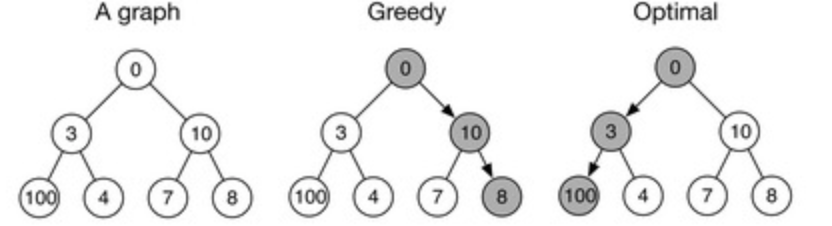

*완전 탐색 알고리즘(exhaustive search algorithm)은 가능한 모든 조합을 평가하기 때문에 최적의 솔루션을 찾는다.<br>
하지만 실전에서는 완전 탐색이 계산하기 불가능한 경우가 많다.<br>
**탐욕적 알고리즘이 덜 복잡하고 효율적으로 계산할 수 있는 솔루션을 만들 수 있다.**<br><br>*

---

<br>


### **SBS 알고리즘 구현**

In [26]:
from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

class SBS():
  def __init__(self, estimator, k_features,
               scoring=accuracy_score,  # 사이킷런의 accuracy_score 함수를 사용하여 특성의 부분 집합에 대한 모델 성능을 평가한다.
               test_size=0.25, random_state=1):
    self.scoring = scoring
    self.estimator = clone(estimator)
    self.k_features = k_features  # 목표 특성 개수
    self.test_size = test_size
    self.random_state = random_state
  
  def fit(self, X, y):  # 최적의 특성 조합에 포함되지 않은 특성은 제외한다.
    X_train, X_test, y_train, y_test = \
      train_test_split(X, y, test_size=self.test_size,
                       random_state=self.random_state)
    dim = X_train.shape[1]
    self.indices_ = tuple(range(dim))
    self.subsets_ = [self.indices_]
    score = self._calc_score(X_train, y_train,
                             X_test, y_test, self.indices_)
    self.scores_ = [score]

    # while 루프 안에서 
    # itertools.combination 함수에 의해 생성된 특성 조합을 평가하고 
    # 원하는 차원이 남을 때까지 특성을 줄인다.
    while dim > self.k_features:
      scores = []
      subsets = []

      for p in combinations(self.indices_, r=dim - 1):
        score = self._calc_score(X_train, y_train,
                                 X_test, y_test, p)
        
        scores.append(score)
        subsets.append(p)
      
      best = np.argmax(scores)
      self.indices_ = subsets[best] # 최종 선택된 특성의 열 인덱스는 self.indices_에 할당한다.
      self.subsets_.append(self.indices_)
      dim -= 1
      self.scores_.append(scores[best]) # 최적 조합의 정확도 점수를 self.scores_ 리스트에 모은다.
    self.k_score_ = self.scores_[-1]

    return self
  
  def transform(self, X): # 선택된 특성 열로 구성된 새로운 데이터 배열을 반환할 때 사용하는 함수
    return X[:, self.indices_]

  def _calc_score(self, X_train, y_train, X_test, y_test, indices):
    self.estimator.fit(X_train[:, indices], y_train)
    y_pred = self.estimator.predict(X_test[:, indices])
    score = self.scoring(y_test, y_pred)
    return score

In [27]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

sbs = SBS(knn, k_features=1)
sbs.fit(X_train_std, y_train)

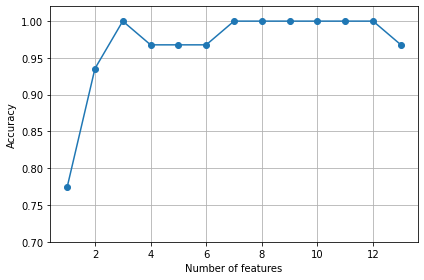

In [28]:
k_feat = [len(k) for k in sbs.subsets_]

plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 1.02])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.tight_layout()
plt.show()

위 그래프를 보면 **특성 개수가 줄었을 때** 검증 데이터셋에서 KNN 분류기의 **정확도가 향상**되었다.<br>
**차원의 저주가 감소**하기 때문이다.<br>
**```k = {3, 7, 8, 9, 10, 11, 12}```**에서는 분류기가 **100% 정확도**를 달성한 것을 볼 수 있다.<br><br>

***차원의 저주(curse of dimensionality)***: *고정된 크기의 훈련 데이터셋이 차원이 늘어남에 따라 특성 공간이 점점 희소해지는 현상*<br>
*=> 고차원 공간에서는 **가장 가까운 이웃**이라도 좋은 추정 값을 만들기에는 **너무 멀리 떨어져 있다**.*

<br>



In [29]:
k3 = list(sbs.subsets_[10])
print(df_wine.columns[1:][k3])

Index(['Alcohol', 'Malic acid', 'OD280/OD315 of diluted wines'], dtype='object')


이 코드는 **```sbs.subsets_``` 속성의 11번째 위치에 있는 세 개의 특성**에 대한 열 인덱스를 얻어, 판다스 ```Wine DataFrame```의 특성 **이름을 출력**한다.<br><br>

11번째인 이유:<br>
SBS는 전체 특성에서 특성을 하나씩 제거하는데, 특성이 세 개 남았을 때가 ```subsets_``` 속성의 11번째 원소이다.<br><br>


가장 작은 개수의 조합(```k=3```)의 세 가지 특성 조합은 다음과 같다.<br>
* Alcohol
* Malic acid
* OD280/OD315 of diluted wines



In [30]:
knn.fit(X_train_std, y_train)
print('훈련 정확도:', knn.score(X_train_std, y_train))
print('테스트 정확도:', knn.score(X_test_std, y_test))

훈련 정확도: 0.967741935483871
테스트 정확도: 0.9629629629629629


**전체 특성 조합을 사용한 정확도**<br>
- 훈련 데이터셋: 약 97% 정확도
- 테스트 데이터셋: 약 96% 정확도

=> 새로운 데이터에도 잘 일반화 될 것으로 보임

In [31]:
knn.fit(X_train_std[:, k3], y_train)
print('훈련 정확도:', knn.score(X_train_std[:, k3], y_train))
print('테스트 정확도:', knn.score(X_test_std[:, k3], y_test))

훈련 정확도: 0.9516129032258065
테스트 정확도: 0.9259259259259259


선택된 세 개의 특성```Alcohol, Malic acid, OD280/OD315 of diluted wines```을 사용한 정확도는 원본 특성보다 **예측 정확도가 조금만 감소**했다.<br>
**세 개의 특성에 담긴 정보**가 원래 데이터셋보다 **적지 않다는 의미**이다.<br><br>

특성 개수를 줄여서 KNN 모델의 성능이 증가하지는 않았지만 **데이터셋의 크기를 줄였다.**<br>
데이터 수집 비용이 높은 **실전 애플리케이션에서는 유용**할 수 있다. <br>
또, 특성 개수를 크게 줄였기 때문에 **더 간단한 모델**을 얻었고, **해석하기도 쉽다**.

<br>

---

<br>
